In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
## Three types of decline curves
# - exponential
# - hyperbolic
# - harmonic

# q = expected production rate at t
# t = time since begining of well
# qi = initial production rate
# b = decline constant
# di = nominal decline rate at t = 0

# b = 1 for harmonics

In [32]:
## Decline Curves:

def Exponential(t, di):
    qi = Data['Production'].max()
    return qi*np.exp(-di*t)
    
def Hyperbolic(t, b, di):
    qi = Data['Production'].max()
    return qi/((1.0+b*di*t)**(1/b))

def Harmonic(t, qi, di):
    return qi/(1+di*t)




In [28]:
Data = pd.read_csv(r'G:\Python Projects\Reservoir Reserve Modeling\data for python\Texas_well_production.csv')
Data['month'] = Data.index

qi = Data['Production'].max()

print(qi)
Data.head(10)



4503.0


,Date,Production,month
0,4/1/1993,2080.0,0
1,5/1/1993,3199.0,1
2,6/1/1993,1966.0,2
3,7/1/1993,4503.0,3
4,8/1/1993,4062.0,4
5,9/1/1993,3493.0,5
6,10/1/1993,3769.0,6
7,11/1/1993,3140.0,7
8,12/1/1993,3140.0,8
9,1/1/1994,2746.0,9


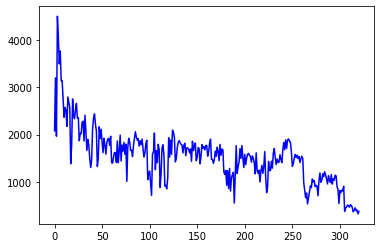

In [33]:
x = Data['month'].values
y = Data['Production'].values

plt.plot(x,y,'b-', label = 'produciton data')


In [52]:
popt, pcov = curve_fit(Exponential, x, y)
exp_vars = popt


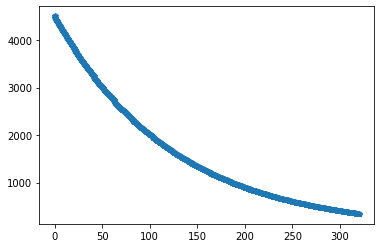

In [55]:
plt.plot(x, Exponential(x, *exp_vars), 'p-', label = 'fit: di = %5.3f' )

In [47]:
popt, pcov = curve_fit(Hyperbolic, x, y)
unconstrained_vars = popt


C:\Users\prestonb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


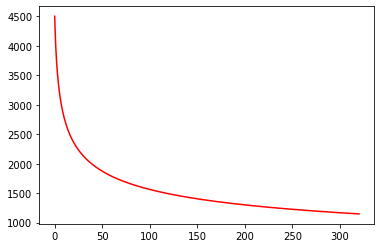

In [48]:
plt.plot(x, Hyperbolic(x, *unconstrained_vars), 'r-', label = 'fit: di = %5.3f' )

In [44]:
## adding contraints:
popt, pcov = curve_fit(Hyperbolic, x, y, bounds= ([0,0], [1,5]))
constrained_vars = popt

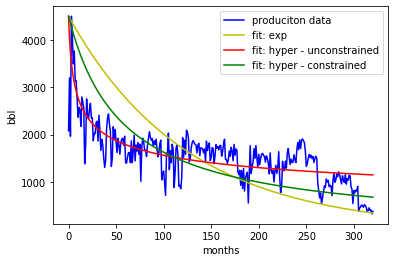

In [59]:
plt.plot(x,y,'b-', label = 'produciton data')
plt.plot(x, Exponential(x, *exp_vars), 'y-', label = 'fit: exp' )
plt.plot(x, Hyperbolic(x, *unconstrained_vars), 'r-', label = 'fit: hyper - unconstrained' )
plt.plot(x, Hyperbolic(x, *constrained_vars), 'g-', label = 'fit: hyper - constrained' )
plt.xlabel('months')
plt.ylabel('bbl')
plt.legend()
plt.show()